# Tracer simulation results

* A notebook shows my NEMO run, frequently changing.

#Content
1. [**Boundary + Initial + Source**](#Boundary-+-Initial-+-Source)

In [1]:
import sys
sys.path.insert(0, '_libs/')

In [2]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [3]:
RB=[0.25, 0.41, 0.88]    # Royal blue
AM=[0.90, 0.17, 0.31]    # Amathran

In [15]:
def plot_Ba(nav_lon, nav_lat, Ba_masked, lev, cmap, ax):
    proj=Basemap(projection='npstere', resolution='c', boundinglat=55, lon_0=90, round=True, ax=ax)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=2.0, linestyle='-', color='k')
    x, y=proj(nav_lon, nav_lat)
    # Ba
    CS=proj.contourf(x, y, Ba_masked, lev, cmap=cmap, extend='both')
    proj.contour(x, y, Ba_masked, lev, linewidths=1.5, colors=('gray',))
    # Frame
    proj.plot(x.T, y.T, color='k', linestyle='-', linewidth=0.01, alpha=0.25)
    proj.plot(x, y, color='k', linestyle='-', linewidth=0.01, alpha=0.25)
    return CS

In [5]:
boundary_name=glob.glob('_data/Exchange/Ba_boundary.mat')
Boundary_Mat=scipy.io.loadmat(boundary_name[0])
domain=Boundary_Mat['domain']

In [11]:
MAT = scipy.io.loadmat('_data/Exchange/NEMO_ORCA2_Ba.mat')
Ba_orca = MAT['Ba_ini_orca'][:]

```fortran
tra(:, :, 1, jpmyt1) = tra(:, :, 1, jpmyt1) + Ba(:, :)*rnf/est(:, :)/1000
```

In [7]:
ptrc_obj1 = nc.Dataset('_data\\RF_NEW_1m_00010101_00061027_ptrc_T.nc')
ptrc_obj2 = nc.Dataset('_data\\DOUBLE01_1m_00010101_00041001_ptrc_T.nc')
Ba1=ptrc_obj1.variables['Ba'][:]*1e-6
Ba2=ptrc_obj2.variables['Ba'][:]*1e-6
nav_lat=ptrc_obj1.variables['nav_lat'][:]
nav_lon=ptrc_obj1.variables['nav_lon'][:]

In [12]:
Ba_masked = np.ma.masked_where(((domain==0) | (Ba1[-1, 0, :, :]==0)), Ba1[-1, 0, :, :])

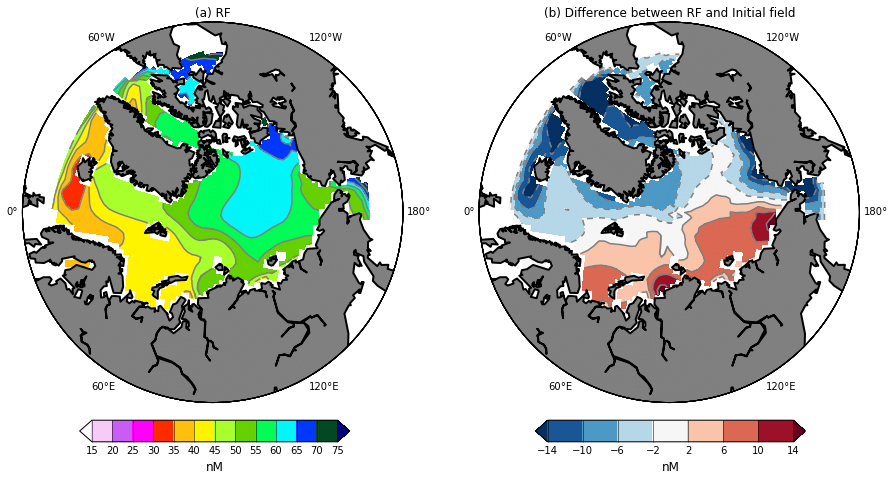

In [34]:
lev1 = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]
lev2 = [-14, -10, -6, -2, 2, 6, 10, 14]

fig = plt.figure(figsize=(15, 15))
ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)

CS1 = plot_Ba(nav_lon, nav_lat, Ba_masked, lev1, plt.cm.gist_ncar_r, ax1)
CS2 = plot_Ba(nav_lon, nav_lat, Ba_masked-Ba_orca[0, :, :], lev2, plt.cm.RdBu_r, ax2)
# Title
ax1.set_title('(a) RF'); ax2.set_title('(b) Difference between RF and Initial field')
# Legend
cax1  = fig.add_axes([0.178, 0.3, 0.25, 0.02])
CBar1 = fig.colorbar(CS1, cax=cax1, orientation='horizontal')
CBar1.set_label('nM', fontsize=12)
CBar1.ax.tick_params(axis='x', length=22)
CBar1.set_ticks(lev1)

cax2  = fig.add_axes([0.6, 0.3, 0.25, 0.02])
CBar2 = fig.colorbar(CS2, cax=cax2, orientation='horizontal')
CBar2.set_label('nM', fontsize=12)
CBar2.ax.tick_params(axis='x', length=22)
CBar2.set_ticks(lev2)

In [41]:
BC = Ba1[:, 0, 125, 55]
MK = Ba1[:, 0, 131, 67]
OB = Ba1[:, 0, 145, -32]
FS = Ba1[:, 0, 135, -48]

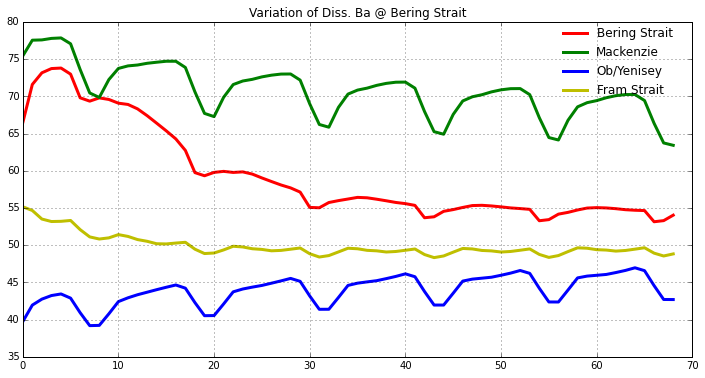

In [42]:
fig = plt.figure(figsize=(12, 6))
ax = fig.gca();ax.grid()
ax.plot(BC, 'r-', lw=3, label='Bering Strait')
ax.plot(MK, 'g-', lw=3, label='Mackenzie')
ax.plot(OB, 'b-', lw=3, label='Ob/Yenisey')
ax.plot(FS, 'y-', lw=3, label='Fram Strait')
#ax.plot(BC4, 'g-', lw=3, label='ICE')
LG = ax.legend(numpoints=1, bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.); LG.draw_frame(False)
ax.set_title('Variation of Diss. Ba @ Bering Strait')

In [13]:
ptrc_obj = nc.Dataset('_data\\TEST_NEW_1m_00010101_00020917_ptrc_T.nc')
Ba=ptrc_obj.variables['Ba'][:]*1e-6
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]
Ba_masked = np.ma.masked_where(((domain==0) | (Ba[10, 0, :, :]==0)), Ba[10, 0, :, :])

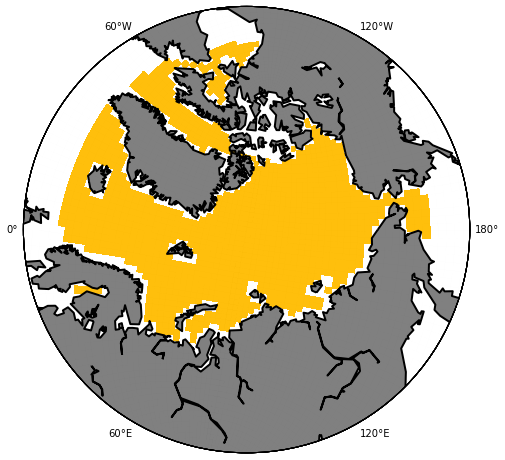

In [14]:
lev = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]
fig = plt.figure(figsize=(8, 8)); ax = fig.gca()
CS = plot_Ba(nav_lon, nav_lat, Ba_masked, lev, ax)

In [15]:
BC = Ba[:, 0, 122, 55]

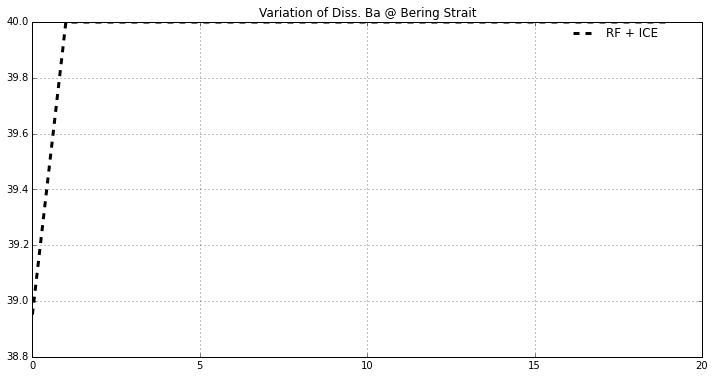

In [16]:
fig = plt.figure(figsize=(12, 6))
ax = fig.gca();ax.grid()
ax.plot(BC, 'k--', lw=3, label='RF + ICE')
LG = ax.legend(numpoints=1, bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.); LG.draw_frame(False)
ax.set_title('Variation of Diss. Ba @ Bering Strait')